In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [5]:
iris=load_iris()
kmeans=KMeans(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

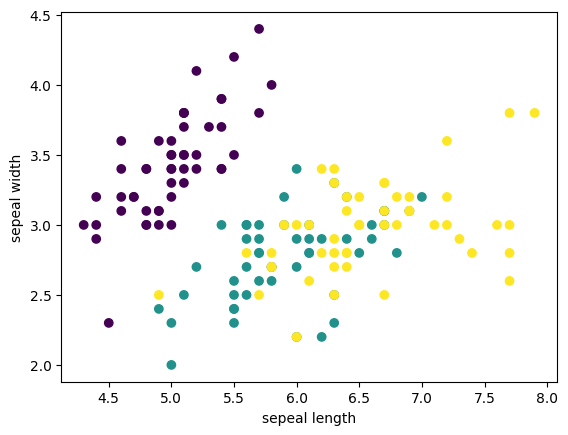

In [7]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.xlabel("sepeal length")
plt.ylabel("sepeal width")
plt.show()